1. Correlation between Music types and RT

ANOVA F-statistic: 0.71, p-value: 0.4895


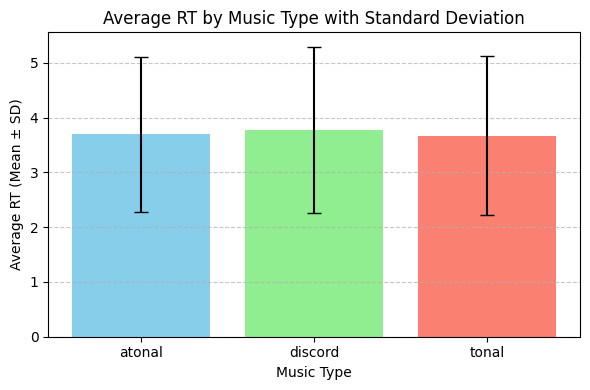

'Music type does not have a significant effect on reaction time (RT).'

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway

def analyze_rt_by_music_type(file_path):
    """
    Analyzes reaction time (RT) differences between music types and performs ANOVA.
    
    Parameters:
        file_path (str): Path to the Excel file containing the data.
        
    Returns:
        str: Conclusion based on the ANOVA test result.
    """
    # Read the Excel file
    data = pd.read_excel(file_path)

    # Ensure the required columns are present
    required_columns = ["participant_id", "music_type", "RT"]
    if not all(col in data.columns for col in required_columns):
        raise ValueError(f"The input file must contain the following columns: {required_columns}")

    # Perform ANOVA to check for significant differences between music types
    tonal = data[data["music_type"] == "tonal"]["RT"]
    atonal = data[data["music_type"] == "atonal"]["RT"]
    discord = data[data["music_type"] == "discord"]["RT"]

    f_stat, p_value = f_oneway(tonal, atonal, discord)
    print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

    # Interpret the results
    if p_value < 0.05:
        conclusion = "Music type has a significant effect on reaction time (RT)."
    else:
        conclusion = "Music type does not have a significant effect on reaction time (RT)."

    # Calculate mean and standard deviation of RT for each music type
    summary_stats = data.groupby("music_type")["RT"].agg(["mean", "std"]).reset_index()

    # Plot the bar chart with error bars
    plt.figure(figsize=(6, 4))
    plt.bar(
        summary_stats["music_type"], 
        summary_stats["mean"], 
        yerr=summary_stats["std"], 
        capsize=5, 
        color=["skyblue", "lightgreen", "salmon"]
    )

    # Add labels, title, and grid
    plt.xlabel("Music Type")
    plt.ylabel("Average RT (Mean ± SD)")
    plt.title("Average RT by Music Type with Standard Deviation")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

    return conclusion

# Example usage:
file_path = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Final_project\data\combined_data_trial.xlsx"
analyze_rt_by_music_type(file_path)



**2. Correlation between music type and Introspective sensitivity**

Correlation between music type and Introspective sensitivity: 0.047
                  sum_sq      df         F    PR(>F)
C(music_type)   0.077576     2.0  1.927372  0.145899
Residual       29.462748  1464.0       NaN       NaN


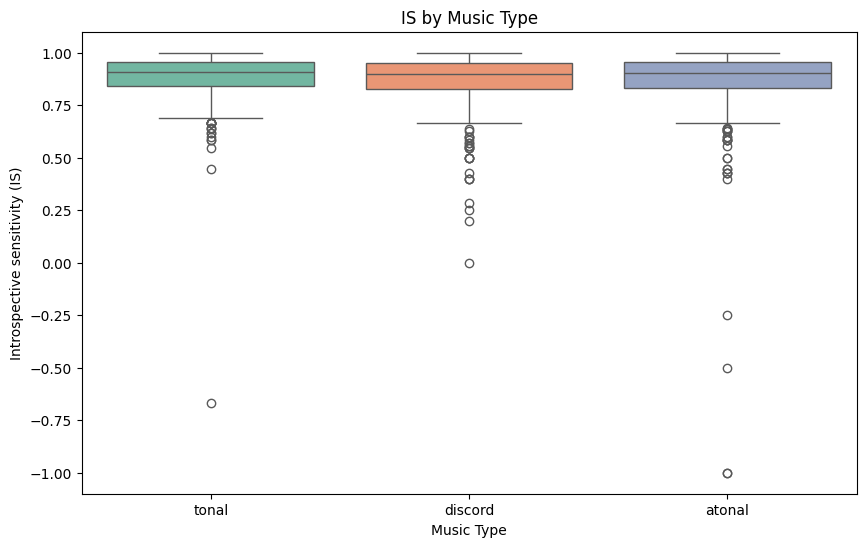

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm



def analyze_music_type_vs_IS(trial_combined_path = str):
    """
    Analyze the relationship between 'music_type' and 'IS'.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing 'music_type' and 'IS' columns.

    Returns:
        tuple: Correlation value and ANOVA table.
    """
    # Reading the file
    df = pd.read_excel(trial_combined_path)

    # 1. Correlation between 'music_type' and 'IS'
    df['music_type_numeric'] = df['music_type'].astype('category').cat.codes  # Convert music_type to numeric
    correlation = df['music_type_numeric'].corr(df['IS'])
    print(f"Correlation between music type and Introspective sensitivity: {correlation:.3f}")

    # 2. ANOVA test for 'music_type' and 'IS'
    model = ols('IS ~ C(music_type)', data=df).fit()  # Fit the model
    anova_table = sm.stats.anova_lm(model, typ=2)  # Perform ANOVA
    print(anova_table)

    # 3. Graph of IS vs music_type
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='music_type', y='IS', data=df, palette="Set2", hue='music_type')
    plt.title('IS by Music Type')
    plt.xlabel('Music Type')
    plt.ylabel('Introspective sensitivity (IS)')
    #plt.savefig('graph.png')
    plt.show()


trial_combined_path = (
    r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Final_project\data\combined_data_trial.xlsx"
)
analyze_music_type_vs_IS(trial_combined_path)

**3. Correlation between Valence rating and PPG**

**4. Correlation between Valence rating and Introspective sensitivity**

**5. PPG by IS**

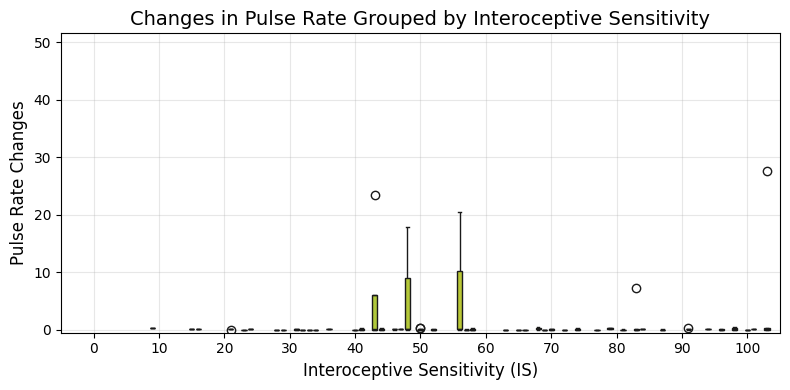

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter

def plot_pulse_rate_by_interoception(trial_combined_path):
    """Analyzes and plots changes in pulse rate grouped by interoceptive sensitivity (IS).

    Parameters:
        trial_combined_path (str): Path to the Excel file.

    Returns:
        None
    """
    # Load data from the first sheet
    data = pd.read_excel(trial_combined_path)

    # Ensure required columns exist
    if "participant_id" not in data.columns or "IS" not in data.columns or "PPG_data" not in data.columns:
        raise ValueError("The input data must contain 'participant_id', 'IS', and 'PPG_data' columns.")

    # Group data by participant_id and IS to calculate changes in pulse rate (standard deviation of 'PPG_data')
    grouped_data = data.groupby(["participant_id", "IS"]).agg({"PPG_data": "std"}).reset_index()

    # Rename columns for clarity
    grouped_data.rename(columns={"PPG_data": "Pulse Rate Changes"}, inplace=True)

    # Plotting the grouped data
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="IS", y="Pulse Rate Changes", data=grouped_data, palette="viridis", hue="IS", legend=False)

    formatter = FuncFormatter(lambda x, pos: f"{x:.0f}")
    plt.gca().xaxis.set_major_formatter(formatter)

    # Customize the plot
    plt.title("Changes in Pulse Rate Grouped by Interoceptive Sensitivity", fontsize=14)
    plt.xlabel("Interoceptive Sensitivity (IS)", fontsize=12)
    plt.ylabel("Pulse Rate Changes", fontsize=12)

    # Setting the limits for the X-axis and Y-axis for a better scale
    plt.xlim(-5, 105)  # Expand x-axis a little for aesthetics
    plt.ylim(grouped_data["Pulse Rate Changes"].min() - 0.5, grouped_data["Pulse Rate Changes"].max() + 0.5)  # Adjust y-axis limits for clarity

    plt.xticks(np.arange(0, 101, 10))  # Setting ticks at every 10 units along x-axis
    plt.grid(alpha=0.3)
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
trial_combined_path = r"C:\Users\Home\Desktop\Studies\Phyton\projects 2024-2025\Final_project\data\combined_data_trial.xlsx"
plot_pulse_rate_by_interoception(trial_combined_path)
